# Project : Examining Factors Responsible for Heart Attacks

DESCRIPTION

Cardiovascular diseases are one of the leading causes of deaths globally. To identify the causes and develop a system to predict potential heart attacks in an effective manner is necessary. The data presented has all the information about relevant factors that might have an impact on cardiovascular health. The data needs to be studied in detail for further analysis.

There is one dataset data that has 14 attributes with more than 4000 data points.

You are required to determine and examine the factors that play a significant role in increasing the rate of heart attacks. Also, use the findings to create and predict a model.

# Import the Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 1. Importing, Understanding, and Inspecting Data :

### 1.1 Perform preliminary data inspection and report the findings as the structure of the data, missing values, duplicates, etc.

#### Importing data

In [2]:
data= pd.read_csv("Cardiovascular diseases.csv")
details = pd.read_csv("Variable Description.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
data.rename(columns={'cp':'chest_pain_type','trestbps':'resting_blood_pressure','chol':'cholestoral',
                     'fbs':'fasting_blood_sugar','restecg':'resting_electrocardiographic_results',
                     'thalach':'maximum_heart_rate_achieved','exang':'exercise_induced_angina',
                     'oldpeak':'ST.depression(exercise/rest)','ca':'no_of_major_vessels',
                     'thal':'thalassemia' },inplace=True)

In [5]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,ST.depression(exercise/rest),slope,no_of_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data.shape

(303, 14)

#### Checking for null values

In [7]:
data.isna().sum()

age                                     0
sex                                     0
chest_pain_type                         0
resting_blood_pressure                  0
cholestoral                             0
fasting_blood_sugar                     0
resting_electrocardiographic_results    0
maximum_heart_rate_achieved             0
exercise_induced_angina                 0
ST.depression(exercise/rest)            0
slope                                   0
no_of_major_vessels                     0
thalassemia                             0
target                                  0
dtype: int64

#### Checking for duplicate values

In [8]:
data.duplicated().sum()

1

### 1.2 Based on the findings from the previous question, remove duplicates (if any) and treat missing values using an appropriate strategy.

#### Removing duplicate values

In [9]:
data =data.drop_duplicates()

#### Treating null values

In [10]:
data.isna().any().value_counts()

False    14
dtype: int64

Looks like perfect data set,as there are no missing values.

### 1.3 Get a preliminary statistical summary of the data. Explore the measures of central tendencies and the spread of the data overall.

#### Statistical summary of the data

In [11]:
data.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,ST.depression(exercise/rest),slope,no_of_major_vessels,thalassemia,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   302 non-null    int64  
 1   sex                                   302 non-null    int64  
 2   chest_pain_type                       302 non-null    int64  
 3   resting_blood_pressure                302 non-null    int64  
 4   cholestoral                           302 non-null    int64  
 5   fasting_blood_sugar                   302 non-null    int64  
 6   resting_electrocardiographic_results  302 non-null    int64  
 7   maximum_heart_rate_achieved           302 non-null    int64  
 8   exercise_induced_angina               302 non-null    int64  
 9   ST.depression(exercise/rest)          302 non-null    float64
 10  slope                                 302 non-null    int64  
 11  no_of_major_vessels

In [13]:
#Segregating numeric and categorical values for calculations

In [14]:
list(enumerate(data))

[(0, 'age'),
 (1, 'sex'),
 (2, 'chest_pain_type'),
 (3, 'resting_blood_pressure'),
 (4, 'cholestoral'),
 (5, 'fasting_blood_sugar'),
 (6, 'resting_electrocardiographic_results'),
 (7, 'maximum_heart_rate_achieved'),
 (8, 'exercise_induced_angina'),
 (9, 'ST.depression(exercise/rest)'),
 (10, 'slope'),
 (11, 'no_of_major_vessels'),
 (12, 'thalassemia'),
 (13, 'target')]

In [15]:
numeric_data = data.iloc[:,[0,3,4,7,9]]
numeric_data.head(2)

,age,resting_blood_pressure,cholestoral,maximum_heart_rate_achieved,ST.depression(exercise/rest)
0,63,145,233,150,2.3
1,37,130,250,187,3.5


In [16]:
categorical_data = data.iloc[:,[1,2,5,6,8,10,11,12,13]]
categorical_data.head(2)

,sex,chest_pain_type,fasting_blood_sugar,resting_electrocardiographic_results,exercise_induced_angina,slope,no_of_major_vessels,thalassemia,target
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1


#### Measures of central tendencies

In [17]:
numeric_data.mean()

age                              54.420530
resting_blood_pressure          131.602649
cholestoral                     246.500000
maximum_heart_rate_achieved     149.569536
ST.depression(exercise/rest)      1.043046
dtype: float64

In [18]:
numeric_data.median()

age                              55.5
resting_blood_pressure          130.0
cholestoral                     240.5
maximum_heart_rate_achieved     152.5
ST.depression(exercise/rest)      0.8
dtype: float64

#### Spread of the data 

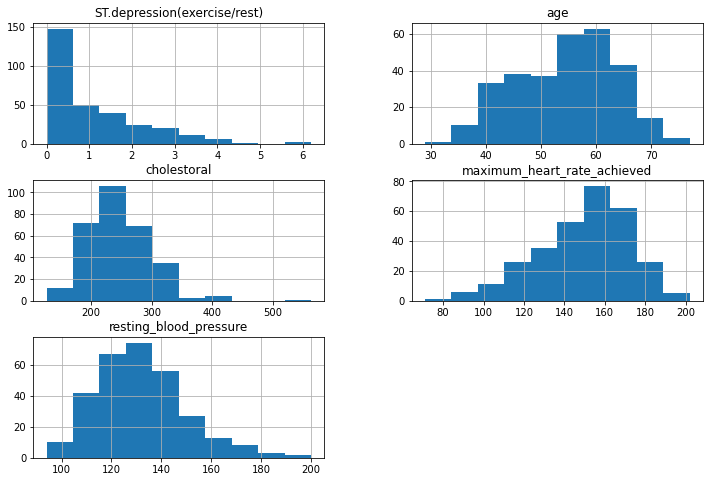

In [19]:
numeric_data.hist(figsize=(12,8))
plt.show()

From above graphs, we observe that:
1. ST.depression(exercise/rest) is right skewed.
2. Maximum hear rate achieved is left skewed.
3. Age,Cholestrol,Resting Blood Pressure is normally distributed.

# 2. Performing EDA and Modeling:

### 2.1 Identify the data variables which might be categorical in nature. Describe and explore these variables using appropriate tools. For example: count plot.

In [20]:
list(enumerate(categorical_data))

[(0, 'sex'),
 (1, 'chest_pain_type'),
 (2, 'fasting_blood_sugar'),
 (3, 'resting_electrocardiographic_results'),
 (4, 'exercise_induced_angina'),
 (5, 'slope'),
 (6, 'no_of_major_vessels'),
 (7, 'thalassemia'),
 (8, 'target')]

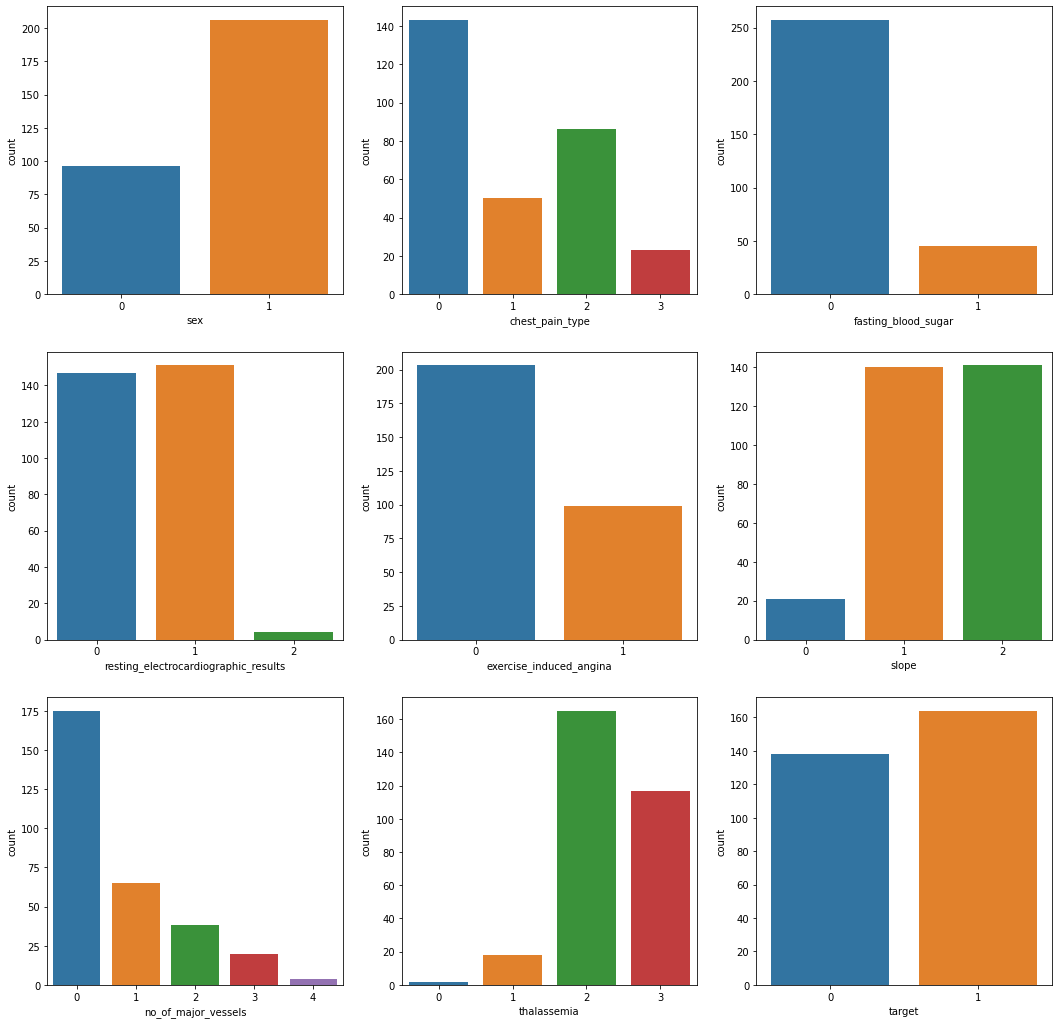

In [21]:
plt.figure(figsize=(18,18))
for i in enumerate(categorical_data):
    plt.subplot(3,3,i[0]+1)
    sns.countplot(i[1], data =categorical_data)

### 2.2 Study the occurrence of CVD across different ages.

In [22]:
df = data[data.target==1]

In [23]:
df.target.value_counts()

1    164
Name: target, dtype: int64

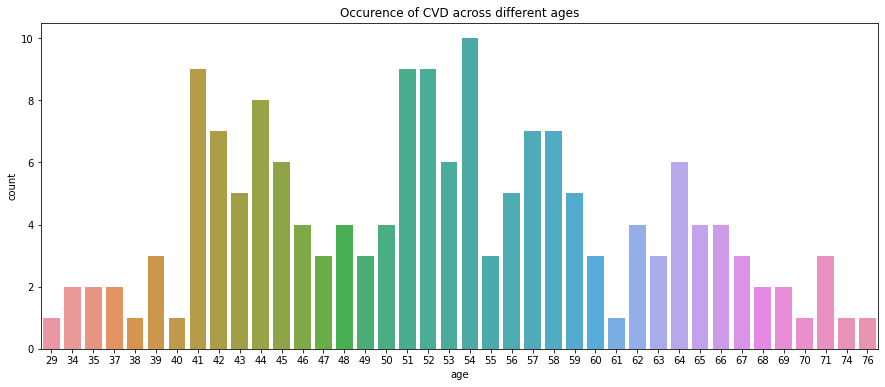

In [24]:
plt.figure(figsize = (15,6))
sns.countplot(x ="age",data= df)
plt.title("Occurence of CVD across different ages")
plt.show()

 We can observe that occurence of disease is more in the age group between 40 to 60, though people of age 50-60 are at more risk.

### 2.3 Can we detect heart attack based on anomalies in resting blood pressure of the patient?

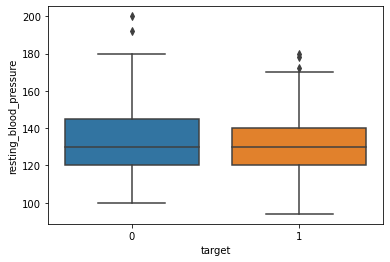

In [25]:
sns.boxplot(y= "resting_blood_pressure", x="target", data=data)
plt.show()

From the above observation, there are people who does not got heart attack also have high blood pressure. Therefore, we can not detect heart attack based on resting blood pressure.

### 2.4 Study the composition of overall patients w.r.t . gender.

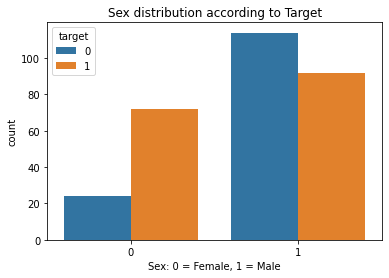

In [26]:
sns.countplot(x="sex", data=data, hue = "target")
plt.title("Sex distribution according to Target")
plt.xlabel("Sex: 0 = Female, 1 = Male")
plt.show()

From the above graph it can be concluded that male patients are more prone to the Cardiovascular disease.
Target = 0 represent Don't have disease, 1 represent have Disease

### 2.5 Describe the relationship between cholesterol levels and our target variable.

In [27]:
data.cholestoral.corr(data.target)

-0.08143720051844129

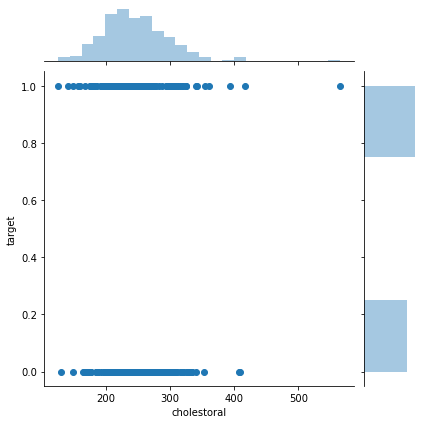

In [28]:
sns.jointplot("cholestoral","target",data)
plt.show()

Cholestoral and target variables have weak correlation.

### 2.6 What can be concluded about the relationship between peak exercising and occurrence of heart attack? 

In [29]:
data.slope.corr(data.target)

0.34393953248938663

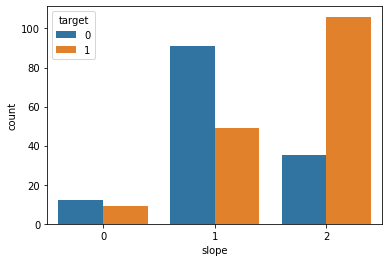

In [30]:
sns.countplot(x="slope",data= data, hue= "target")

People with Downsloping(2) have more people prone to heart attack. Peak exercising is poitively correlated to the target variable.

### 2.7 Is thalassemia a major cause of CVD? 

In [31]:
data.thalassemia.corr(data.target)

-0.3431007123895646

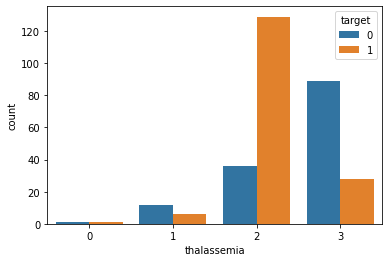

In [32]:
sns.countplot(x="thalassemia",data= data, hue= "target")

Thalassemia--0=Null, 1= Normal, 2= Fixed Defect, 3=Reversable defect. People with fixed defect are at higher risk of CVD

### 2.8 How are the other factors determining the occurrence of CVD?

In [33]:
new_data = data.drop(columns =["thalassemia","cholestoral","slope"])

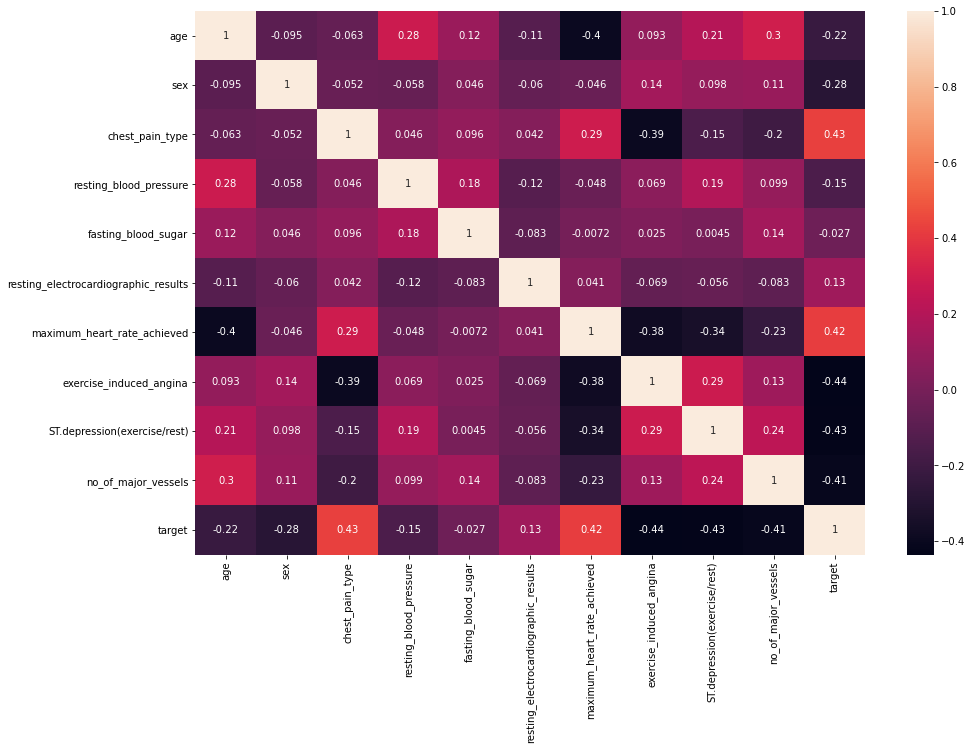

In [34]:
plt.figure(figsize = (15,10))
sns.heatmap(new_data.corr(), annot = True)
plt.show()

Chest pain type and maximum heart rate achieved are positively correlated to target, and they are the causes of heart attack, there are no major causes as such.

### 2.9 Use a pair plot to understand the relationship between all the given variables.

<Figure size 720x576 with 0 Axes>

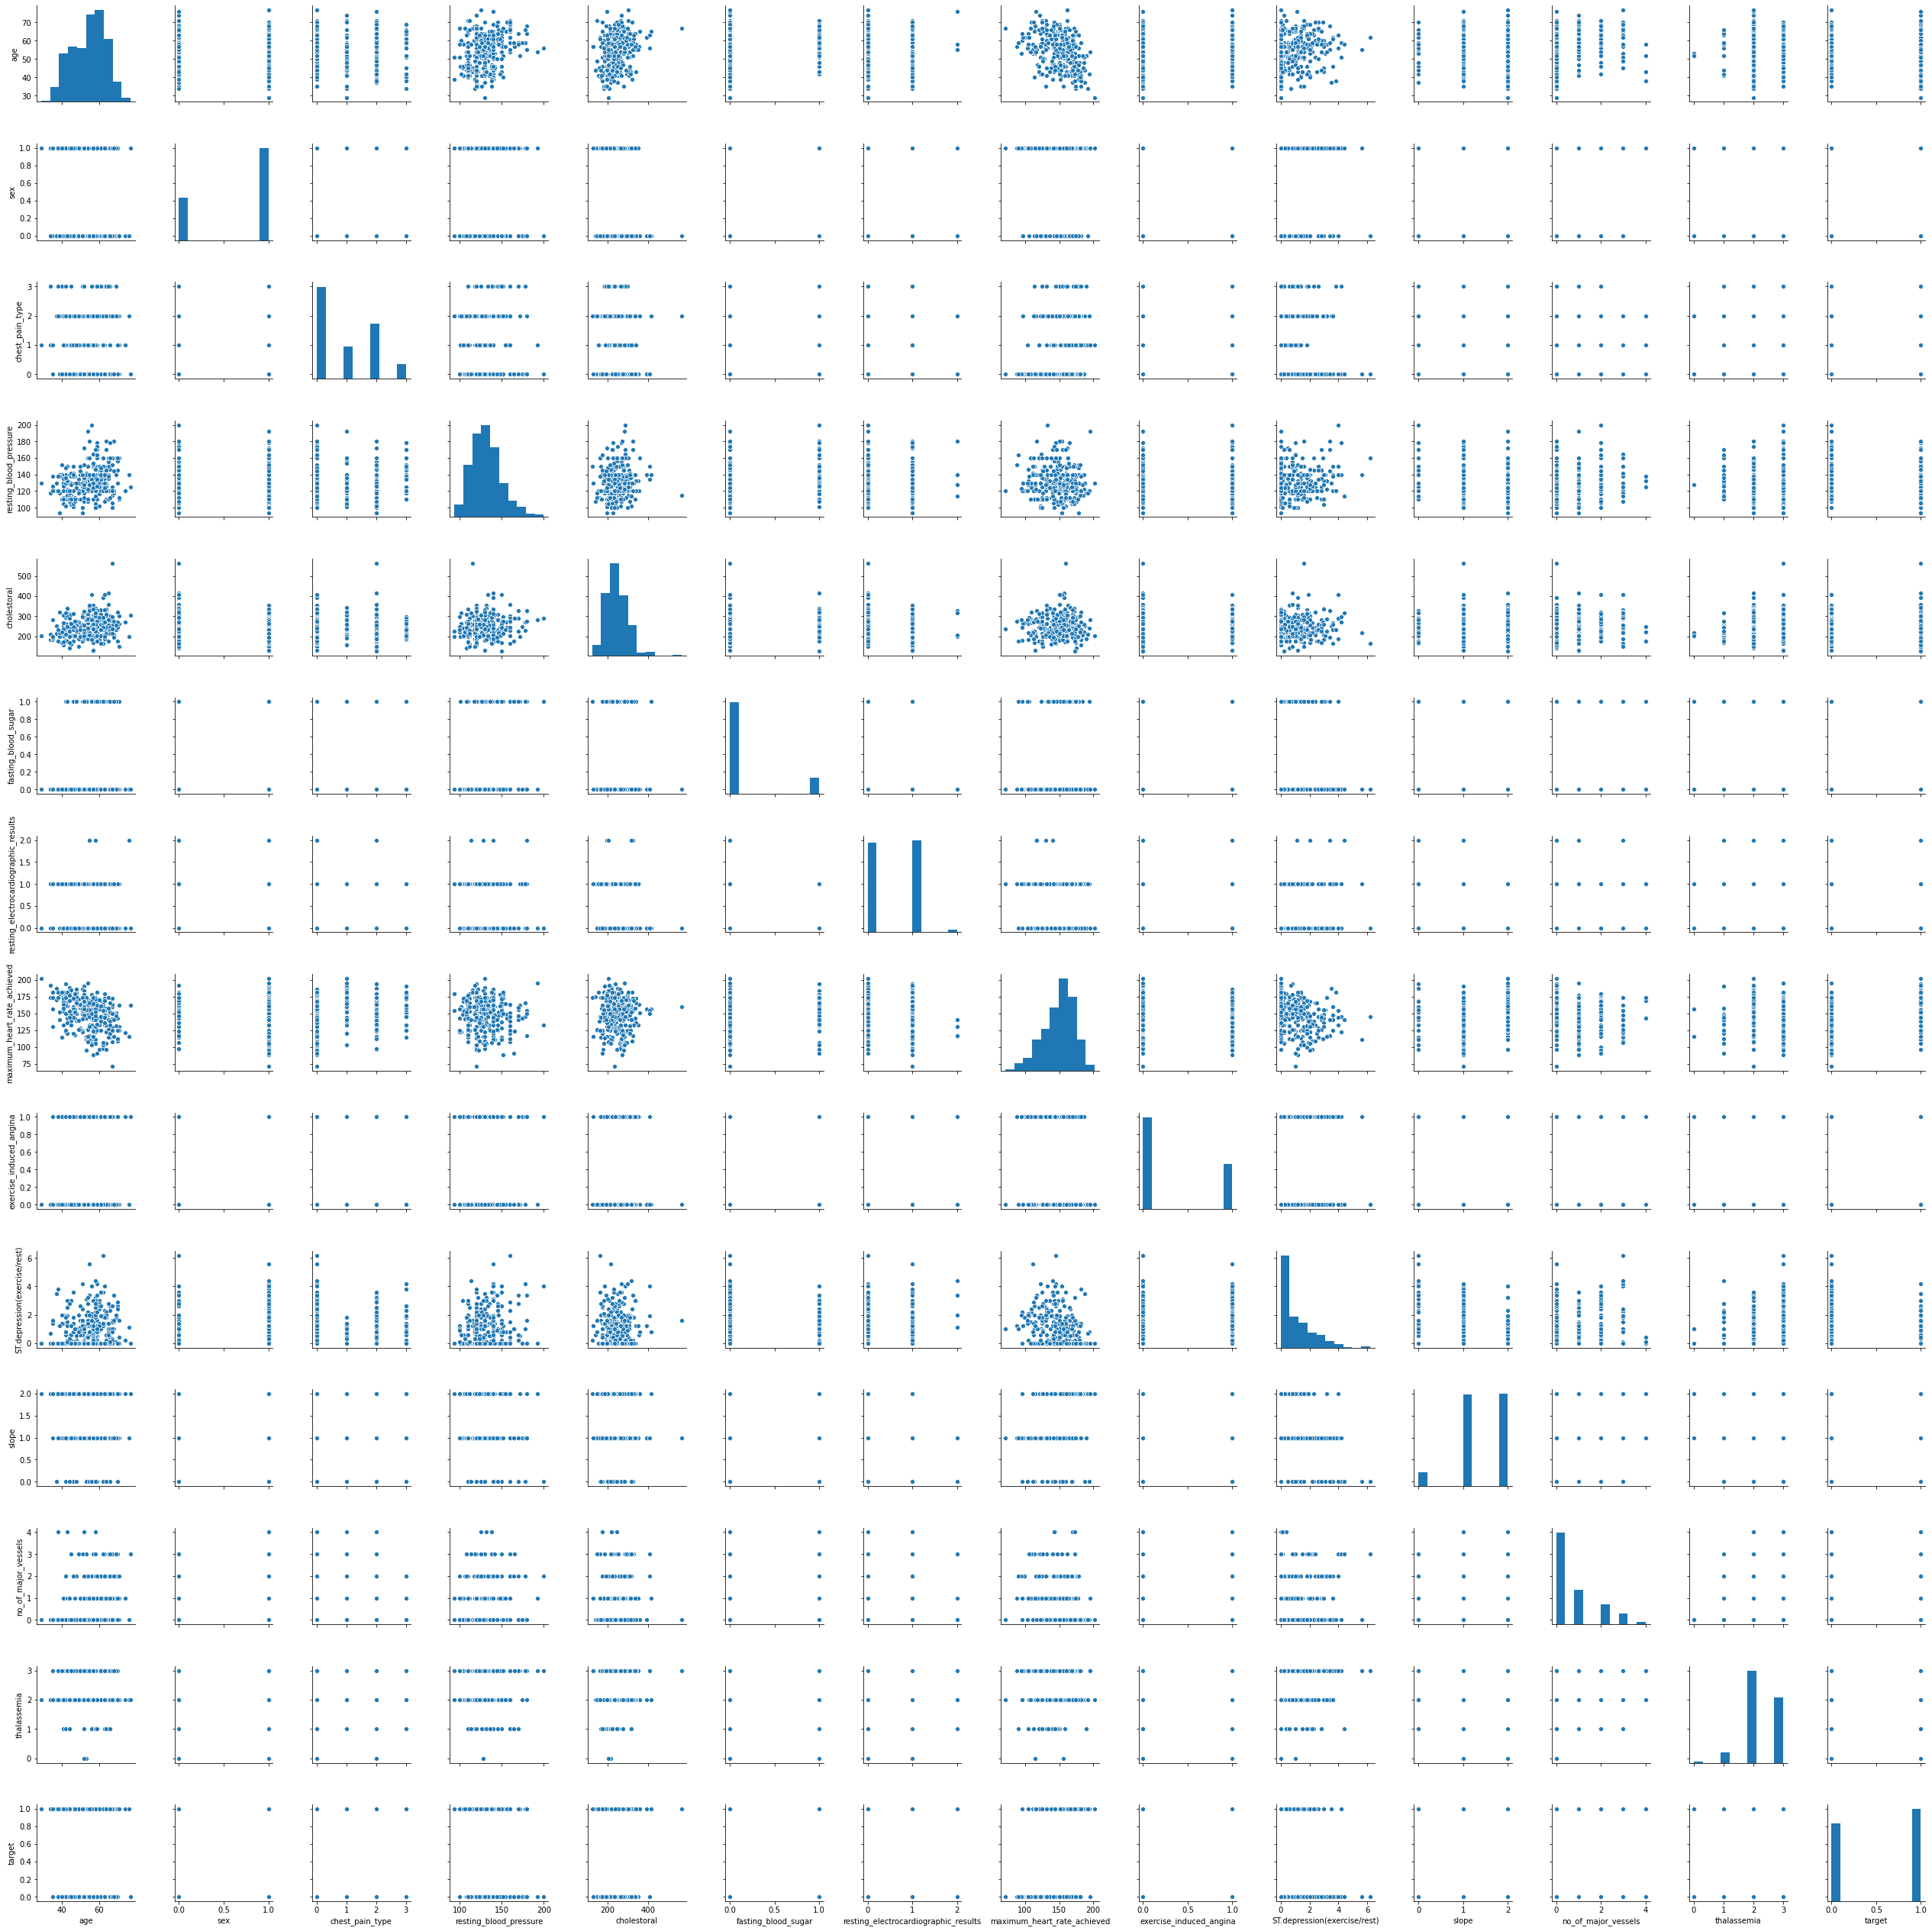

In [36]:
plt.figure(figsize=(10,8))
sns.pairplot(data)
plt.show()

### 2.9 Perform logistic regression, predict the outcome for test data, and validate the results by using the confusion matrix. 

In [37]:
df = data.copy()

In [38]:
df.head(2)

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,ST.depression(exercise/rest),slope,no_of_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [39]:
X = df.drop(["target"],axis=1)
y = df["target"]

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1234)

In [41]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((241, 13), (61, 13), (241,), (61,))

For training we have 241 data points and for testing we have 61

In [42]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [43]:
log.fit(X_train,y_train)

C:\Users\kanik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
y_pred = log.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0], dtype=int64)

In [45]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred)

In [46]:
conf_mat

array([[20,  9],
       [ 5, 27]], dtype=int64)

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74        29
           1       0.75      0.84      0.79        32

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



Accuracy for the logistic regression model is 77%.

# 3. Dashboarding

### 3.1 Visualize the variables using Tableau to create an understanding for attributes of a Diseased vs. a Healthy person.

https://public.tableau.com/app/profile/payal.bhargava/viz/FactorsaffectingHeartAttack/Story1

### 3.2 Demonstrate the variables associated with each other and factors to build a dashboard

https://public.tableau.com/app/profile/payal.bhargava/viz/Correlation-FactorsaffectingHeartAttack/Sheet1